Лабораторная работа №2. Чистов Владимир, 381806-2

In [50]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from random import random

Загружаем изображение:

(450, 341, 3)


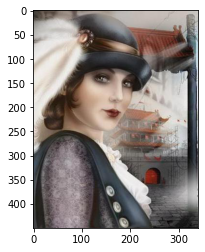

In [51]:
image = cv2.imread('D:\photo3.png')[:,:,:3]
rows, columns, channels = image.shape
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(image.shape)

Применим Convolution (5 фильтров размером 3x3x3):

In [52]:
#Conv

img = image
rows, columns, channels = img.shape

filters = np.random.uniform(0,1 , size = (5,3,3,3))
n, rows_f, columns_f, channels_f = filters.shape

res = np.zeros((n, rows, columns), 'float')
B = [random() for i in range(n)]
for n in range(n):
    for r in range(rows):
        for col in range(columns):
            res[n][r][col] = B[n]
            for r_f in range(rows_f):
                for col_f in range(columns_f):
                    for ch_f in range(channels_f):
                        if (r+r_f < rows) and (col+col_f < columns):
                             res[n][r][col] += np.dot(filters[n][r_f][col_f][ch_f], img[r+r_f][col+col_f][ch_f])

print(res.shape, '\n', res)

(5, 450, 341) 
 [[[ 835.40884862  835.5574121   834.69587817 ... 2807.29414408
   1657.42382892  628.03081668]
  [ 853.74510167  854.36526427  857.82224175 ... 2807.29414408
   1657.42382892  628.03081668]
  [ 870.97348069  861.57930693  859.93247905 ... 2807.29414408
   1657.42382892  628.03081668]
  ...
  [1069.81480345 1010.97069091  942.90145726 ...  395.70153775
    239.7351466    79.46285521]
  [ 678.63563195  647.91165084  603.37613685 ...  167.55107823
    124.59556406   50.69274121]
  [ 311.8958652   302.80562535  282.88344594 ...   13.23583955
     10.34011078    4.8137419 ]]

 [[ 670.30306734  671.58944945  669.9949054  ... 2286.2144641
   1549.30161017  826.37659504]
  [ 685.13027275  685.69462599  688.44102373 ... 2286.2144641
   1549.30161017  826.37659504]
  [ 702.8296252   693.50250644  691.92759525 ... 2286.2144641
   1549.30161017  826.37659504]
  ...
  [ 884.60850059  845.98874194  791.47624561 ...  338.45392203
    228.02210803  132.15967631]
  [ 590.71930905  571.4

Применим Нормализацию:

In [53]:
#Normalization

img = res
channels, rows, columns = img.shape

res = np.zeros(img.shape, 'float')

r_a = [random() for i in range(5)]
r_b = [random() for i in range(5)]
for i in range(channels):
    mean = np.mean(img[i,:,:])
    std = np.std(img[i,:,:])
    res[i,:,:] = (r_a[i] * (img[i,:,:] - mean) / std) + r_b[i]

print(res.shape, '\n', res)

(5, 450, 341) 
 [[[ 0.61395443  0.61397921  0.61383551 ...  0.94287041  0.75106883
    0.5793632 ]
  [ 0.61701297  0.61711642  0.61769305 ...  0.94287041  0.75106883
    0.5793632 ]
  [ 0.61988671  0.61831974  0.61804504 ...  0.94287041  0.75106883
    0.5793632 ]
  ...
  [ 0.653054    0.64323864  0.6318845  ...  0.54061002  0.51459439
    0.48786053]
  [ 0.58780422  0.58267938  0.57525073 ...  0.50255389  0.49538879
    0.48306159]
  [ 0.526631    0.52511473  0.52179165 ...  0.47681368  0.47633066
    0.47540885]]

 [[-0.0398635  -0.03898327 -0.04007437 ...  1.06585938  0.56161057
    0.06693324]
  [-0.02971766 -0.02933149 -0.02745221 ...  1.06585938  0.56161057
    0.06693324]
  [-0.01760649 -0.02398878 -0.02506644 ...  1.06585938  0.56161057
    0.06693324]
  ...
  [ 0.1067797   0.08035328  0.04305191 ... -0.26693857 -0.34250397
   -0.40809994]
  [-0.09432044 -0.10751357 -0.13081145 ... -0.4064505  -0.43142324
   -0.45467384]
  [-0.32943038 -0.3336145  -0.34304146 ... -0.49166395 -0

Применим функцию активации ReLU:

In [54]:
#ReLU

img = res
channels, rows, columns  = img.shape

res = np.zeros((channels, rows, columns), 'float')
  
for ch in range(channels):
    for r in range(rows):
        for col in range(columns):
            res[ch][r][col] = np.maximum(0, img[ch][r][col])

print(res.shape, '\n', res)

(5, 450, 341) 
 [[[0.61395443 0.61397921 0.61383551 ... 0.94287041 0.75106883 0.5793632 ]
  [0.61701297 0.61711642 0.61769305 ... 0.94287041 0.75106883 0.5793632 ]
  [0.61988671 0.61831974 0.61804504 ... 0.94287041 0.75106883 0.5793632 ]
  ...
  [0.653054   0.64323864 0.6318845  ... 0.54061002 0.51459439 0.48786053]
  [0.58780422 0.58267938 0.57525073 ... 0.50255389 0.49538879 0.48306159]
  [0.526631   0.52511473 0.52179165 ... 0.47681368 0.47633066 0.47540885]]

 [[0.         0.         0.         ... 1.06585938 0.56161057 0.06693324]
  [0.         0.         0.         ... 1.06585938 0.56161057 0.06693324]
  [0.         0.         0.         ... 1.06585938 0.56161057 0.06693324]
  ...
  [0.1067797  0.08035328 0.04305191 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.10964398 0.10958102 0.10948406 ... 0.24368417 0.17023336 0.10386471]
  [0.1

Применим MaxPooling:

In [55]:
#MaxPooling

img = res
channels, rows, columns = img.shape

half_size_r=int(rows/2)
half_size_col=int(columns/2)

res = np.zeros((5, half_size_r, half_size_col),'float')

for ch in range(channels):
    for r in range(half_size_r):
        for col in range(half_size_col):
            res[ch, r, col] = max(img[ch, r * 2, col * 2], img[ch, r * 2, col * 2 + 1], img[ch, r * 2 + 1, col * 2], img[ch, r * 2 + 1, col * 2 + 1])

print(res.shape, '\n', res)

(5, 225, 170) 
 [[[0.61711642 0.61769305 0.61650208 ... 0.94396019 0.94470004 0.94287041]
  [0.62222357 0.6187865  0.62920777 ... 0.94374651 0.94470004 0.94287041]
  [0.62325195 0.62485635 0.63041429 ... 0.94365286 0.94470004 0.94287041]
  ...
  [0.65386514 0.63105653 0.63149705 ... 0.60944805 0.59799982 0.58135923]
  [0.65333159 0.6318845  0.6306261  ... 0.59028379 0.58571937 0.56961807]
  [0.58780422 0.57525073 0.57267907 ... 0.50193923 0.50255389 0.50255389]]

 [[0.         0.         0.         ... 1.06697789 1.07090943 1.06585938]
  [0.         0.         0.0043669  ... 1.06686488 1.07090943 1.06585938]
  [0.         0.         0.00903487 ... 1.06473369 1.07090943 1.06585938]
  ...
  [0.11321832 0.03825443 0.02827558 ... 0.         0.         0.        ]
  [0.11125481 0.04305191 0.02618423 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.11086806 0.11111472 0.11078325 ... 0.24407252 0.24438785 0.24368417]
  [0.1

Применим SoftMax:

In [56]:
#SoftMax

img = res
channels, rows, columns = img.shape

res = np.zeros((channels, rows, columns), 'float')
    
for r in range(rows):
    for col in range(columns):
        tmp_sum = 0
        for ch in range(channels):
            tmp_sum += math.exp(img[ch, r, col])
        for chan in range(channels):
            res[chan, r, col] = math.exp(img[chan, r, col]) / tmp_sum

print(res.shape, '\n', res)

(5, 225, 170) 
 [[[0.28630035 0.28637521 0.28620736 ... 0.16997685 0.16948222 0.17013009]
  [0.28599281 0.28637801 0.28632368 ... 0.17004495 0.16948222 0.17013009]
  [0.28607285 0.28617866 0.28610587 ... 0.17024892 0.16948222 0.17013009]
  ...
  [0.27985688 0.28354461 0.28452822 ... 0.28572494 0.28536791 0.28652776]
  [0.28006678 0.28320248 0.28467083 ... 0.2866201  0.28657895 0.28608964]
  [0.28832961 0.28760227 0.28803583 ... 0.28527779 0.28521791 0.28521791]]

 [[0.15445843 0.15440976 0.15450315 ... 0.19222758 0.19228092 0.19239535]
  [0.15350653 0.15424252 0.15328241 ... 0.19232395 0.19228092 0.19239535]
  [0.15339166 0.1532024  0.1536969  ... 0.19216271 0.19228092 0.19239535]
  ...
  [0.16298066 0.15673671 0.15565017 ... 0.15533461 0.1569268  0.16020852]
  [0.16286983 0.15717023 0.15553825 ... 0.15883626 0.15954    0.16185278]
  [0.16018031 0.16179463 0.16245578 ... 0.17269451 0.17255217 0.17255217]]

 [[0.1725683  0.17255647 0.17260362 ... 0.08441749 0.08413611 0.08455288]
  [0.1